In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
# Load the data
file_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Dados do Censo - não usar na regressão\População total.xlsx"
df = pd.read_excel(file_path, sheet_name="Planilha2")

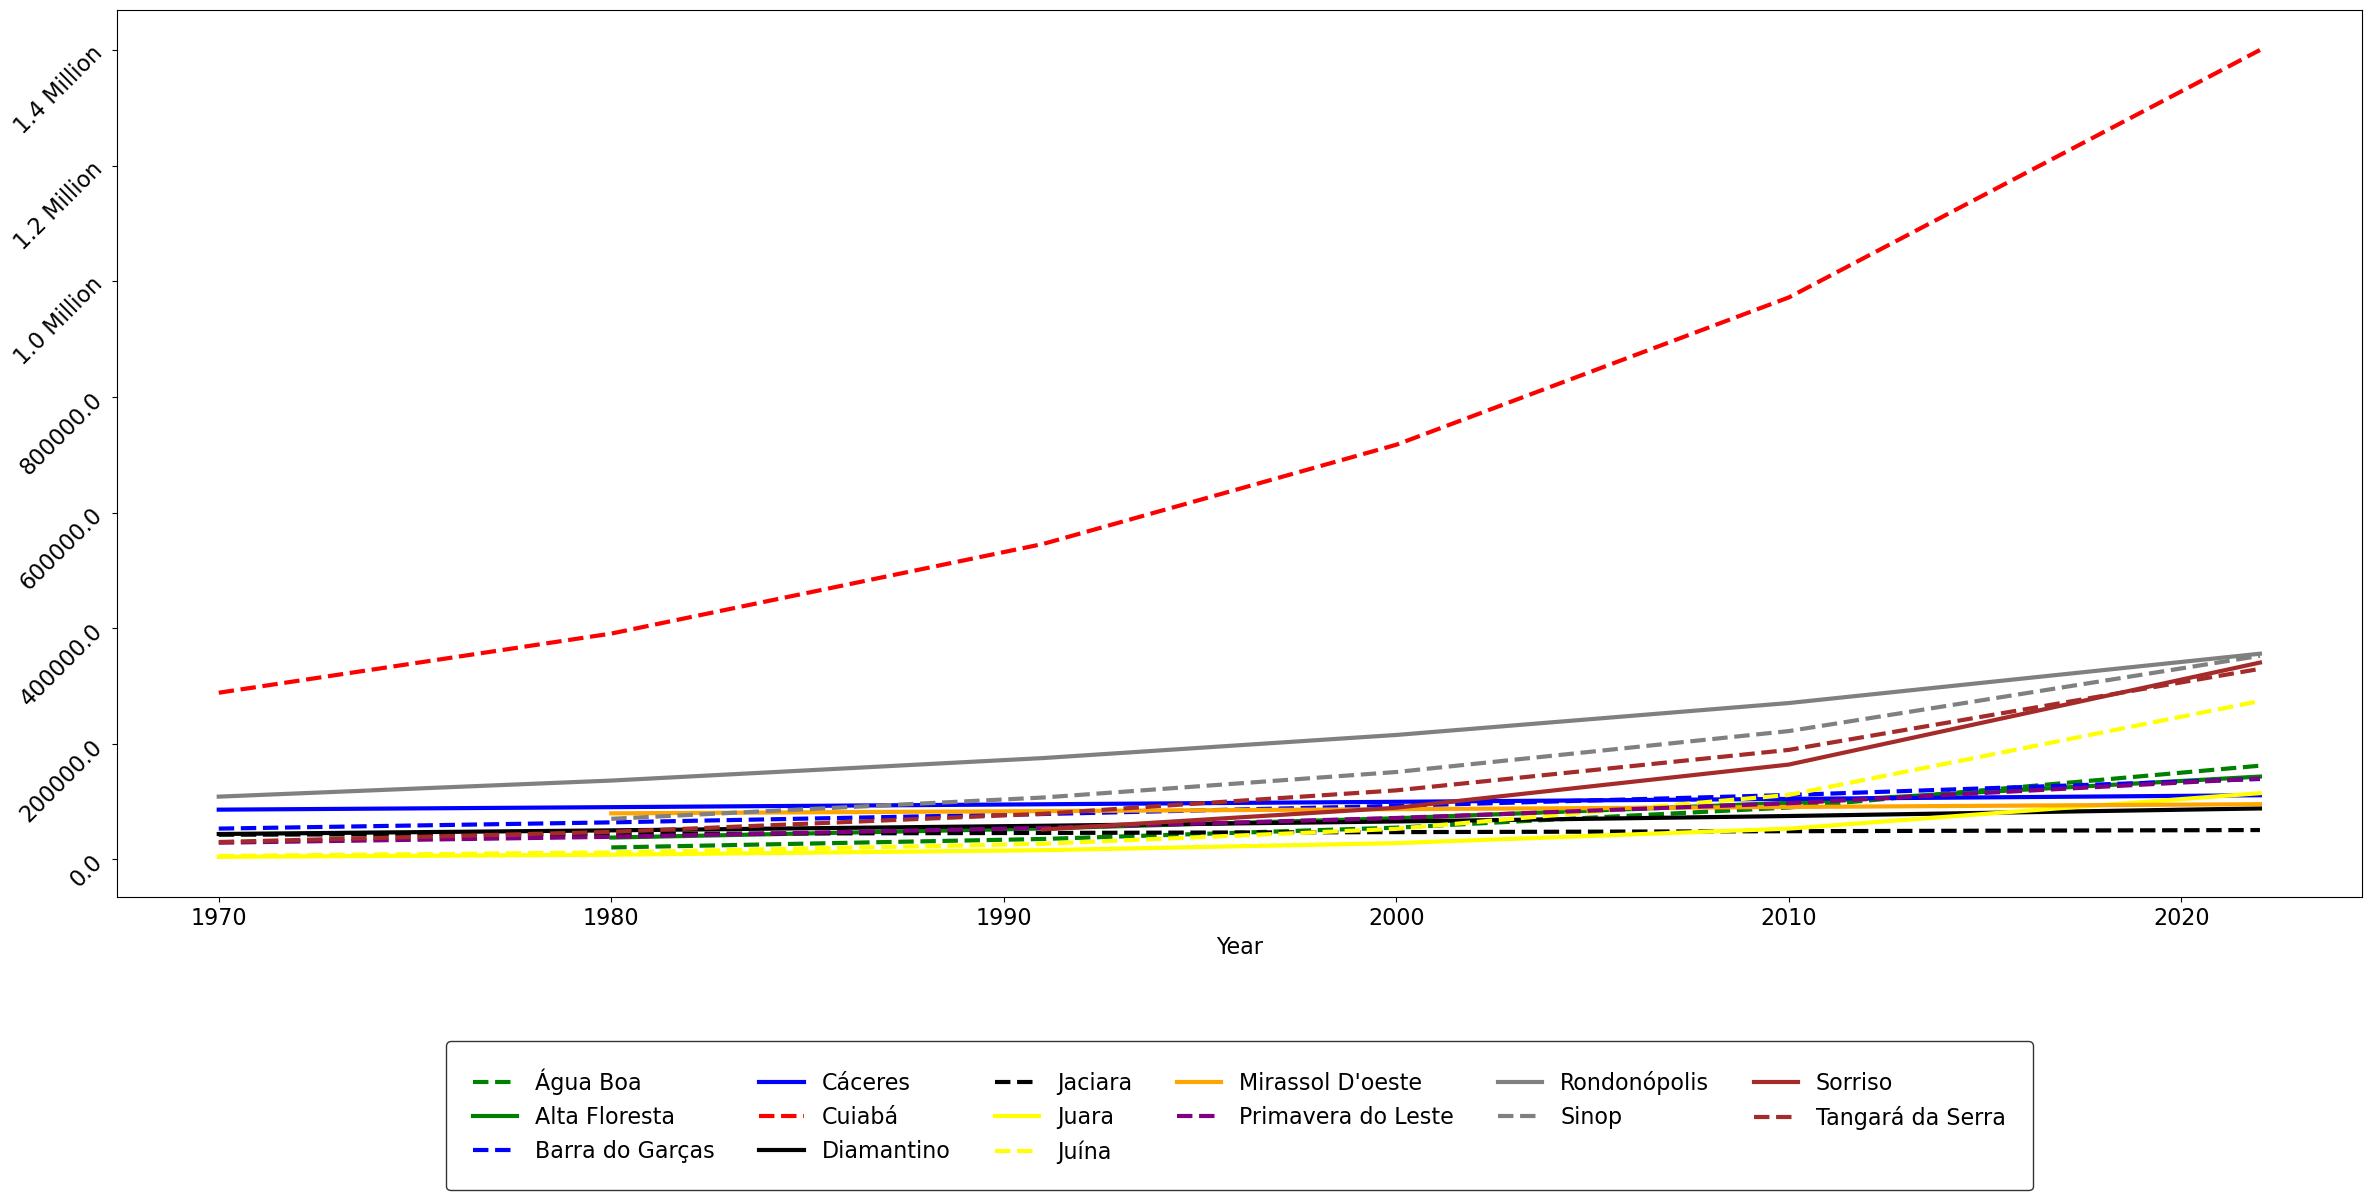

In [18]:
# List of regions 
regions = [
    "Água Boa", "Alta Floresta", "Barra do Garças", "Cáceres", "Cuiabá", 
    "Diamantino", "Jaciara", "Juara", "Juína", "Mirassol D'oeste", 
    "Primavera do Leste", "Rondonópolis", "Sinop", "Sorriso", "Tangará da Serra"
]

# Filter out zeros or negative values before log transformation
df = df[df['Total ammount'] > 0].copy()
df['log_Total ammount'] = np.log(df['Total ammount'])

# Colors and line styles
colors = [
    'green', 'green', 'blue', 'blue', 'red', 'black', 'black', 
    'yellow', 'yellow', 'orange', 'purple', 'gray', 'gray', 'brown', 'brown'
]
line_styles = [
    '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--'
]

# Create dictionaries to store predictions
predictions = {}

# Create figure with larger size to accommodate bigger fonts
plt.figure(figsize=(24, 16))

# Set global font size
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16
})

# For each region, perform exponential fit and plot
for i, region in enumerate(regions):
    region_df = df[df['Regions'] == region]
    if len(region_df) >= 2:  # Need at least 2 points for a fit
        try:
            # Fit log-linear model (equivalent to exponential)
            X = sm.add_constant(region_df['Year'])
            y = region_df['log_Total ammount']
            model = sm.OLS(y, X).fit()
            
            # Generate predictions
            years = np.array(sorted(region_df['Year'].unique()))
            X_pred = sm.add_constant(years)
            log_pred = model.predict(X_pred)
            pred = np.exp(log_pred)
            
            # Store predictions
            predictions[region] = pred
            
            # Plot the fitted line with thicker lines
            plt.plot(years, pred, color=colors[i], linestyle=line_styles[i], linewidth=3.0, label=region)
        except:
            print(f"Could not fit exponential curve for {region} - possibly insufficient data")
            continue

# Format y-axis labels to use "Million" instead of 10^6
import matplotlib.ticker as ticker

def millions_formatter(x, pos):
    return f"{x/1000000:.1f} Million" if x >= 1000000 else f"{x:.1f}"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Customize the plot
plt.xlabel('Year', fontsize=16)
plt.ylabel('')  # Empty string removes y-axis label
plt.yticks(rotation=45)
plt.grid(False)

# Legend settings with larger font
legend = plt.legend(
    fontsize=16,
    ncol=6,
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    frameon=True,
    framealpha=0.8,
    edgecolor='black',
    borderpad=1.2
)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0.15, 1, 0.95])

# Save the plot with high resolution
output_path = r"C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Graph9.jpg"
plt.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
plt.show()

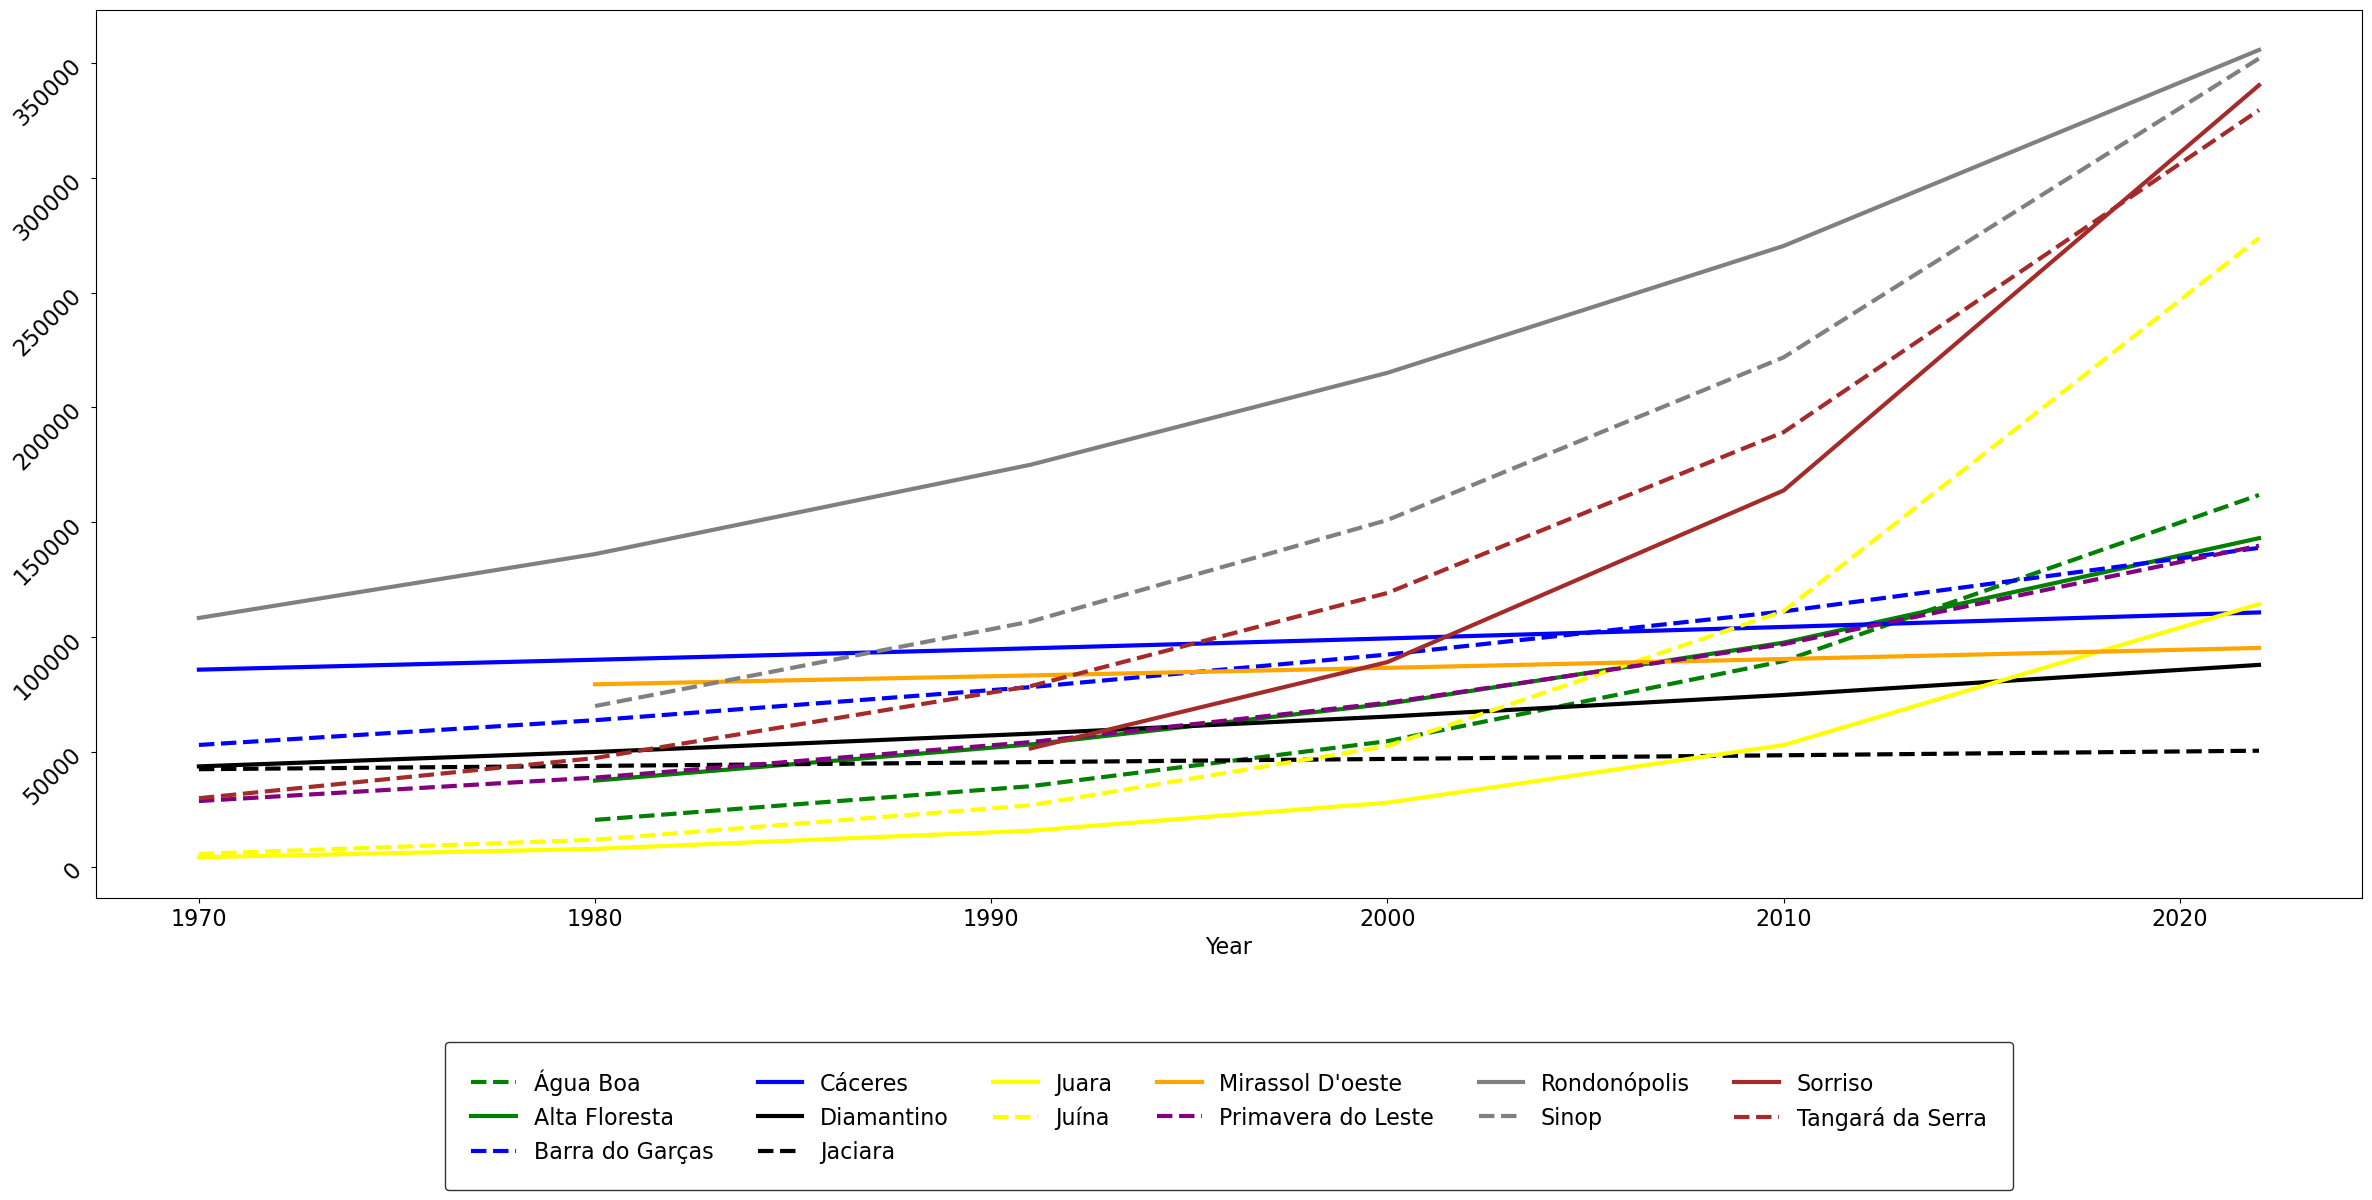

In [11]:
# Create another plot without Cuiabá
plt.figure(figsize=(24, 16))

# Set global font size
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16
})

# Updated regions list excluding Cuiabá
regions_no_cuiaba = [region for region in regions if region != "Cuiabá"]
colors_no_cuiaba = colors[:4] + colors[5:]  # Remove Cuiabá's color
line_styles_no_cuiaba = line_styles[:4] + line_styles[5:]  # Remove Cuiabá's line style

# Plot each region except Cuiabá
for i, region in enumerate(regions_no_cuiaba):
    region_df = df[df['Regions'] == region]
    if len(region_df) >= 2 and region in predictions:
        years = np.array(sorted(region_df['Year'].unique()))
        plt.plot(years, predictions[region], 
                 color=colors_no_cuiaba[i], 
                 linestyle=line_styles_no_cuiaba[i], 
                 linewidth=3.0,
                 label=region)

# Customize the plot
plt.xlabel('Year', fontsize=16)
plt.ylabel('')  # Empty string removes y-axis label
plt.yticks(rotation=45)
plt.grid(False)

# Legend settings with larger font
legend = plt.legend(
    fontsize=16,
    ncol=6,
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    frameon=True,
    framealpha=0.8,
    edgecolor='black',
    borderpad=1.2
)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0.15, 1, 0.95])

# Save the plot with high resolution
output_path = r"C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Graph10.jpg"
plt.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
plt.show()